In [1]:
import datetime
import pandas_datareader.data as web
from sarimaxModel import sarimaxPrdict
from sarimaxModel import quickParameters
from sarimaxModel import selectParameters
from sarimaxModel import predictbyticker
import pandas as pd
from sarimaxModel import forcastStocks
from loadstocks import loadStocksByTickers
from loadstocks import loadAuNotNaTickersFromYahooExcel
from sarimaxModel import predictbyticker
import pandas as pd
from sarimaxModel import forcastStocks
from loadstocks import loadStocksByTickers
from loadstocks import loadAuNotNaTickersFromYahooExcel
# We will look at stock prices over the past year, starting at January 1, 2016


ticker='ASX.AX'
months=12
end = datetime.date.today()
day=end.day
year=end.year-months//12-1
month=months%12+1
start=datetime.datetime(year,month,day)

data=web.DataReader(ticker,"yahoo",start,end)['Adj Close']   

#y=data.resample('MS').mean()

#parameters=quickParameters(paramPath,ticker,y,steps=2,disp=False)
#parameters=selectParameters(ticker,y,steps=2,disp=True)
#['8CO.AX', 0, 0, 0, 0, 0, 0, 12, 't', -7.909122119923726, 0.03528654153968552]

#parameters=['MFG.AX', 0, 0, 1, 0, 1, 0, 12, 'n', 321.3071720270583, 0.486377988114156]
data[-1]

75.93000030517578

['ASX.AX', 0, 0, 0, 1, 1, 1, 12, 'c', 2192.9512997448646, 0.11898412622389254]
forcast:: 2019-05-15    75.322765
2019-05-16    75.342283
2019-05-17    75.759185
Freq: C, dtype: float64


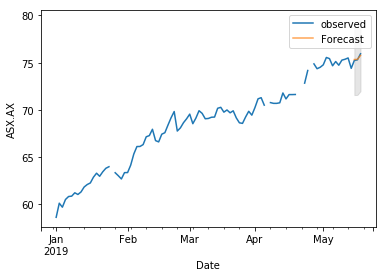

In [2]:
y=data.resample('C').mean()

#parameters=quickParameters(paramPath,ticker,y,steps=2,disp=False)
parameters=selectParameters(ticker,y,steps=3,disp=True)

Date
2017-01-16    45.033546
2017-01-17    44.777721
2017-01-18    45.060955
2017-01-19    44.759449
2017-01-20    44.439674
2017-01-23    44.640678
2017-01-24    44.832546
2017-01-25          NaN
2017-01-26    45.453819
2017-01-27    44.942177
2017-01-30    45.581734
2017-01-31    45.901508
2017-02-01    45.737049
2017-02-02    45.801006
2017-02-03    45.700508
2017-02-06    45.563457
2017-02-07    46.065960
2017-02-08    46.303509
2017-02-09    46.522785
2017-02-10    46.824287
2017-02-13    46.906513
2017-02-14    47.536930
2017-02-15    47.509525
2017-02-16    47.271976
2017-02-17    46.659836
2017-02-20    46.842560
2017-02-21    47.116653
2017-02-22    47.098381
2017-02-23    47.070972
2017-02-24    47.098381
                ...    
2019-04-03    71.279999
2019-04-04    70.489998
2019-04-05          NaN
2019-04-08    70.760002
2019-04-09    70.680000
2019-04-10    70.680000
2019-04-11    70.739998
2019-04-12    71.779999
2019-04-15    71.150002
2019-04-16    71.610001
2019-04-17 

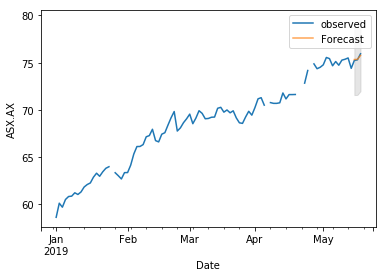

In [3]:
import statsmodels.api as sm
import os
# SARIMAX example
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pylab as plt
from sklearn.metrics import mean_squared_error
steps=3

train_y, test_y = y[:-steps], y[-steps:]
print(train_y)
p1,p2,t=parameters[1:4],parameters[4:8],parameters[8]
print(p1,p2,t)
model = SARIMAX(train_y,
     order=p1,
     seasonal_order=p2,
     trend=t,
     enforce_stationarity=False,
     enforce_invertibility=False)

model_fit = model.fit(disp=False)

forcast=model_fit.forecast(steps=len(test_y))
print(forcast)  
pred_ci=pd.DataFrame(index=forcast.index)
pred_ci['low'] = forcast-forcast*0.05
pred_ci['upper'] = forcast+forcast*0.05


#pred_ci.loc[y.index[-1]]=[y[-1],y[-1]]
#pred_ci=pred_ci.sort_index()
ax = y['2019-01-01':].plot(label='observed')
forcast.plot(ax=ax, label='Forecast', alpha=.7)

ax.fill_between(forcast.index,
                pred_ci.iloc[:,0],
                pred_ci.iloc[:,1], color='k', alpha=.1)

ax.set_xlabel('Date')
ax.set_ylabel(ticker)
plt.legend()

plt.show()


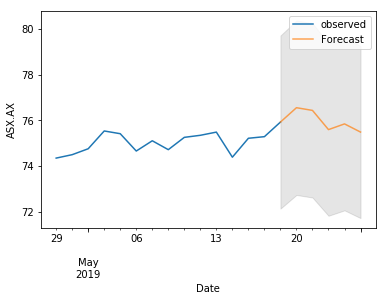

In [4]:

if( len(parameters)>0):
    
    p1,p2,t=parameters[1:4],parameters[4:8],parameters[8]
    result=sarimaxPrdict(ticker,y,p1,p2,t,steps=5,disp=True,days=20)
else:
    print("wrong parameters",len(parameters))

In [5]:
result

2019-05-17    75.930000
2019-05-20    76.560685
2019-05-21    76.442232
2019-05-22    75.599888
2019-05-23    75.850063
2019-05-24    75.491466
dtype: float64